In [3]:
#importing libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.utils import shuffle

%matplotlib inline

In [4]:
#loading csv file
# Making a list of missing value types
missing_values = ["-"]
sample_data = pd.read_csv('House_prediction.csv', na_values = missing_values)


In [5]:
#converting csv file into dataframe
df =pd.DataFrame(sample_data)
#shuffling data
i=0
for i in range(5):
    df = shuffle(df)
 

In [6]:
   
#checking for null valuse and replacing them
df.isnull()
df.fillna(0, inplace=True)

#label encoding animal and furniture columns
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['animal']=le.fit_transform(df['animal']) 
df['furniture']=le.fit_transform(df['furniture'])





In [7]:
#check for null values
print(df.isnull().sum())

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64


In [8]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4634,Belo Horizonte,156,7,2,1,3.0,0,1,350,2200,187,30,2767
7024,São Paulo,260,3,5,3,3.0,0,1,4400,4500,134,58,9092
9500,São Paulo,47,1,1,0,4.0,1,1,100,1000,76,13,1189
3457,Campinas,75,3,2,1,2.0,0,1,280,900,0,12,1192
10211,São Paulo,85,2,1,0,4.0,0,0,620,2190,0,28,2838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Belo Horizonte,100,3,2,3,0.0,0,1,0,2800,0,46,2846
9697,São Paulo,62,2,1,1,13.0,0,1,543,2200,59,28,2830
2783,Belo Horizonte,87,3,2,2,11.0,0,1,700,3500,125,47,4372
10237,São Paulo,300,3,3,4,0.0,0,1,0,7900,862,119,8881


In [10]:
#printing shape of dataframe
df.shape

(10692, 13)

In [11]:
#grouping features city wise and finding mean of them city wise 
sample_data.groupby('city').mean()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,,
Belo Horizonte,207.411765,3.020668,2.402226,1.955485,5.302402,2324.197138,3664.127981,272.782194,53.675676,6315.242448
Campinas,137.561547,2.355217,1.960141,1.558030,5.625578,628.922626,2364.290739,147.657679,32.388042,3173.276671
Porto Alegre,103.609388,2.140821,1.725901,1.044426,4.679680,491.618609,2337.699916,124.021794,36.425817,2989.782900
Rio de Janeiro,105.347768,2.243837,1.756163,0.744171,5.653515,1079.432378,3232.904064,256.853431,42.483011,4611.684877
São Paulo,158.899439,2.558859,2.467641,1.877527,7.751697,1169.627994,4652.793783,495.701716,62.428911,6380.831833


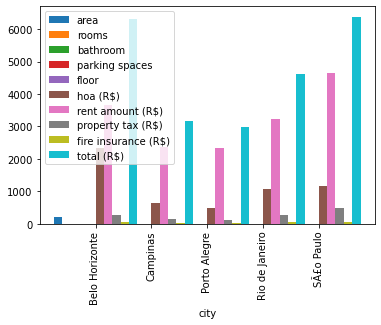

In [291]:
#plotting the mean of features city wise 
sample_data.groupby('city').mean().plot(kind='bar',width = 1.5)


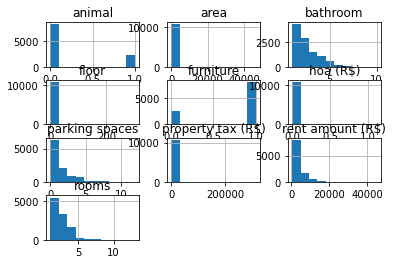

In [12]:
vit =df[['area', 'rooms', 'bathroom', 'parking spaces','floor','animal','furniture','hoa (R$)','rent amount (R$)','property tax (R$)']]
vit.hist()
plt.show()
      
      
      
      
      
      
      

c:\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


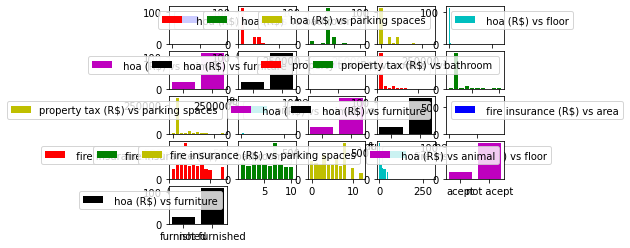

<Figure size 1080x720 with 0 Axes>

In [9]:
#Bar graph : to get intution of dependance of taxes on features like area,room,bathroom,parkingspaces,floor




#use above hist plot for this purpose
a =  pd.DataFrame(sample_data) 
fig  = plt.figure()
plt.figure(figsize=(15,10))

plt1 = fig.add_subplot(551)
plt2 = fig.add_subplot(552)
plt3 = fig.add_subplot(553)
plt4 = fig.add_subplot(554)
plt5 = fig.add_subplot(555)
plt6 = fig.add_subplot(556)
plt7 = fig.add_subplot(557)

plt1.bar(a.loc[:, 'area'],a.loc[:, 'hoa (R$)']/ 10 **4 ,label = '  hoa (R$) vs area', color ='b')
plt2.bar(a.loc[:, 'rooms'],a.loc[:, 'hoa (R$)'] / 10 **4,label = '  hoa (R$) vs rooms', color ='r')
plt3.bar(a.loc[:, 'bathroom'],a.loc[:, 'hoa (R$)'] / 10**4,label = '  hoa (R$)  vs bathroom ', color ='g')
plt4.bar(a.loc[:, 'parking spaces'],a.loc[:, 'hoa (R$)'] / 10 **4,label = 'hoa (R$) vs parking spaces', color ='y')
plt5.bar(a.loc[:, 'floor'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs floor', color ='c')
plt6.bar(a.loc[:, 'animal'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs animal', color ='m')
plt7.bar(a.loc[:, 'furniture'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs furniture', color ='k')

plt1.legend()
plt2.legend()
plt3.legend()
plt4.legend()
plt5.legend()
plt6.legend()
plt7.legend()





plt8 = fig.add_subplot(558)
plt9 = fig.add_subplot(559)
plt10 = fig.add_subplot(5,5,10)
plt11= fig.add_subplot(5,5,11)
plt12 = fig.add_subplot(5,5,12)
plt13 = fig.add_subplot(5,5,13)
plt14= fig.add_subplot(5,5,14)



plt8.bar(a.loc[:, 'area'],a.loc[:, 'property tax (R$)'],label = ' property tax (R$) vs area', color ='b')
plt9.bar(a.loc[:, 'rooms'],a.loc[:, 'property tax (R$)'],label = ' property tax (R$) vs rooms', color ='r')
plt10.bar(a.loc[:, 'bathroom'],a.loc[:, 'property tax (R$)'],label = 'property tax (R$) vs bathroom ', color ='g')
plt11.bar(a.loc[:, 'parking spaces'],a.loc[:, 'property tax (R$)'],label = 'property tax (R$) vs parking spaces', color ='y')
plt12.bar(a.loc[:, 'floor'],a.loc[:, 'property tax (R$)'],label = 'property tax (R$) vs floor', color ='c')
plt13.bar(a.loc[:, 'animal'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs animal', color ='m')
plt14.bar(a.loc[:, 'furniture'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs furniture', color ='k')

plt8.legend()
plt9.legend()
plt10.legend()
plt11.legend()
plt12.legend()
plt13.legend()
plt14.legend()







plt15 = fig.add_subplot(5,5,15)
plt16= fig.add_subplot(5,5,16)
plt17= fig.add_subplot(5,5,17)
plt18= fig.add_subplot(5,5,18)
plt19 = fig.add_subplot(5,5,19)
plt20= fig.add_subplot(5,5,20)
plt21= fig.add_subplot(5,5,21)



plt15.bar(a.loc[:, 'area'],a.loc[:, 'fire insurance (R$)'],label = ' fire insurance (R$) vs area', color ='b')
plt16.bar(a.loc[:, 'rooms'],a.loc[:, 'fire insurance (R$)'],label = ' fire insurance (R$) vs rooms', color ='r')
plt17.bar(a.loc[:, 'bathroom'],a.loc[:, 'fire insurance (R$)'],label = 'fire insurance (R$) vs bathroom ', color ='g')
plt18.bar(a.loc[:, 'parking spaces'],a.loc[:, 'fire insurance (R$)'],label = 'fire insurance (R$) vs parking spaces', color ='y')
plt19.bar(a.loc[:, 'floor'],a.loc[:, 'fire insurance (R$)'],label = 'fire insurance (R$) vs floor', color ='c')
plt20.bar(a.loc[:, 'animal'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs animal', color ='m')
plt21.bar(a.loc[:, 'furniture'],a.loc[:, 'hoa (R$)'] / 10 **4,label = ' hoa (R$) vs furniture', color ='k')

plt15.legend()
plt16.legend()
plt17.legend()
plt18.legend()
plt19.legend()
plt20.legend()
plt21.legend()





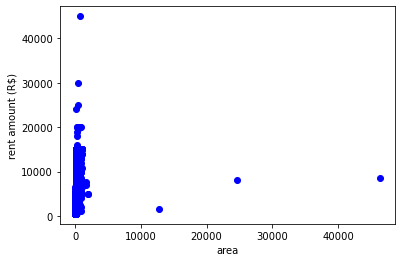

In [15]:
#plotting rent dependance on features

plt.scatter(df.area, df['rent amount (R$)'],  color='blue')
plt.xlabel("area")
plt.ylabel("rent amount (R$)")
plt.show()

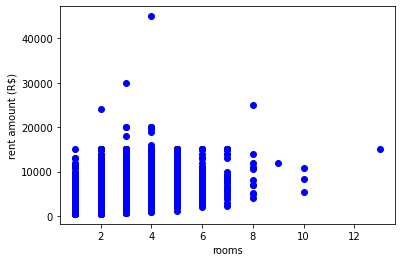

In [16]:
plt.scatter(df.rooms, df['rent amount (R$)'],  color='blue')
plt.xlabel("rooms")
plt.ylabel("rent amount (R$)")
plt.show()

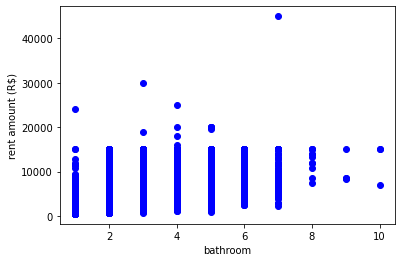

In [17]:
plt.scatter(df.bathroom, df['rent amount (R$)'],  color='blue')
plt.xlabel("bathroom")
plt.ylabel("rent amount (R$)")
plt.show()

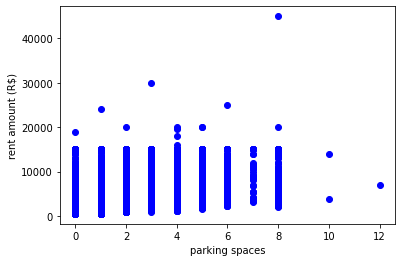

In [19]:
plt.scatter(df['parking spaces'], df['rent amount (R$)'],  color='blue')
plt.xlabel("parking spaces")
plt.ylabel("rent amount (R$)")
plt.show()

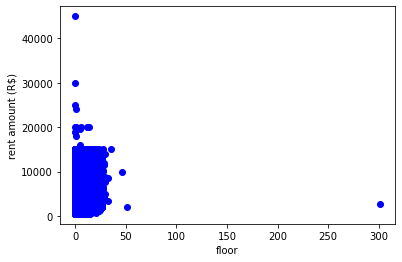

In [20]:
plt.scatter(df['floor'], df['rent amount (R$)'],  color='blue')
plt.xlabel("floor")
plt.ylabel("rent amount (R$)")
plt.show()

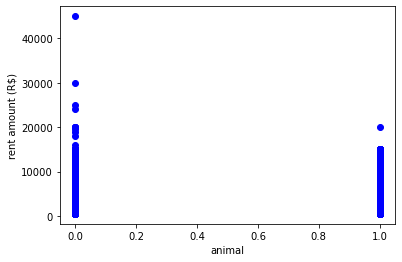

In [21]:
plt.scatter(df['animal'], df['rent amount (R$)'],  color='blue')
plt.xlabel("animal")
plt.ylabel("rent amount (R$)")
plt.show()

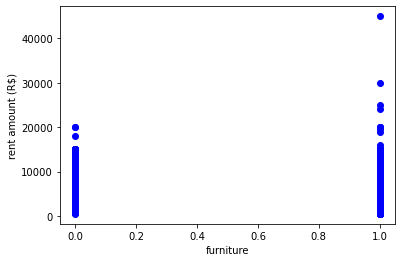

In [23]:
plt.scatter(df['furniture'], df['rent amount (R$)'],  color='blue')
plt.xlabel("furniture")
plt.ylabel("rent amount (R$)")
plt.show()

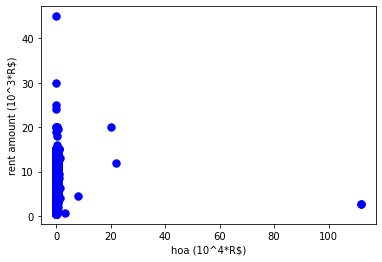

In [37]:
plt.scatter(df['hoa (R$)']/ 10**4, df['rent amount (R$)']/10**3, s=55, color='blue')
plt.xlabel("hoa (10^4*R$)")
plt.ylabel("rent amount (10^3*R$)")
plt.show()

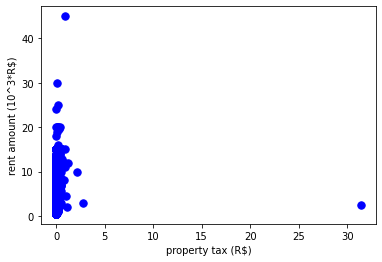

In [38]:
plt.scatter(df['property tax (R$)']/ 10**4, df['rent amount (R$)']/10**3, s=55, color='blue')
plt.xlabel("property tax (R$)")
plt.ylabel("rent amount (10^3*R$)")
plt.show()

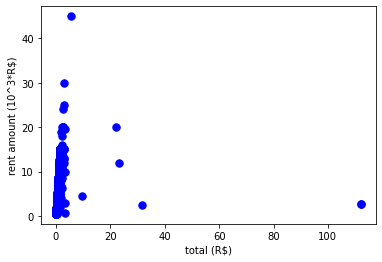

In [39]:
plt.scatter(df['total (R$)']/ 10**4, df['rent amount (R$)']/10**3, s=55, color='blue')
plt.xlabel("total (R$)")
plt.ylabel("rent amount (10^3*R$)")
plt.show()

In [ ]:
#so from above graphs we infer that mostly all graphs ,except for FLOOR graph, form a vertical line i.e. x=const ,i.e. the x and y coordinates are not in any relation,this means resnt amount does not depent on any of given factors except floor.  

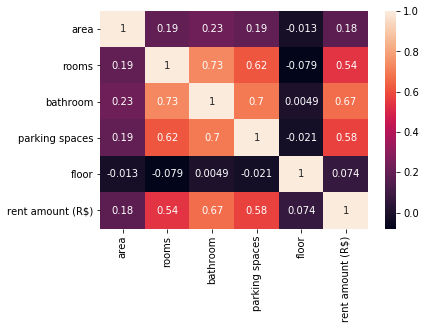

In [12]:
#correlation matrix for relation check
df = pd.DataFrame(df,columns=['area', 'rooms', 'bathroom', 'parking spaces','floor','rent amount (R$)',])

corrMatrix = df.corr()
seabornInstance.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#correlation graph also states that almost all correlations of rent amount with other features are near zero .....so rent amount does not depend on any of the given features


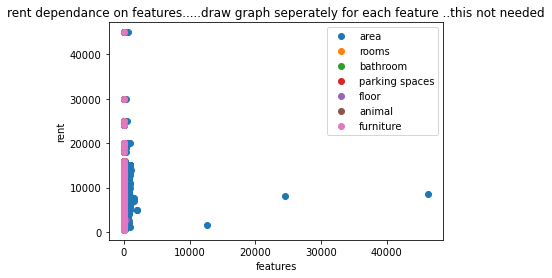

In [67]:
#plotting rent dependance on features (above method better )

ax = plt.gca()



df.plot(x='area' , y='rent amount (R$)' , style='o', ax=ax,label='area') 
df.plot(x ='rooms' , y= 'rent amount (R$)', style='o',ax=ax,label='rooms') 
df.plot(x ='bathroom' , y= 'rent amount (R$)' , style='o',ax=ax,label='bathroom') 
df.plot(x='parking spaces' , y ='rent amount (R$)' , style='o',ax=ax,label='parking spaces') 
df.plot(x ='floor' , y='rent amount (R$)'  , style='o',ax=ax,label='floor' ) 
df.plot(x='animal' , y ='rent amount (R$)' , style='o',ax=ax,label='animal' ) 
df.plot(x = 'furniture', y='rent amount (R$)'  , style='o',ax=ax,label='furniture') 

plt.title('rent dependance on features.....draw graph seperately for each feature ..this not needed')  
plt.xlabel('features')  
plt.ylabel('rent')
plt.legend()
plt.show()



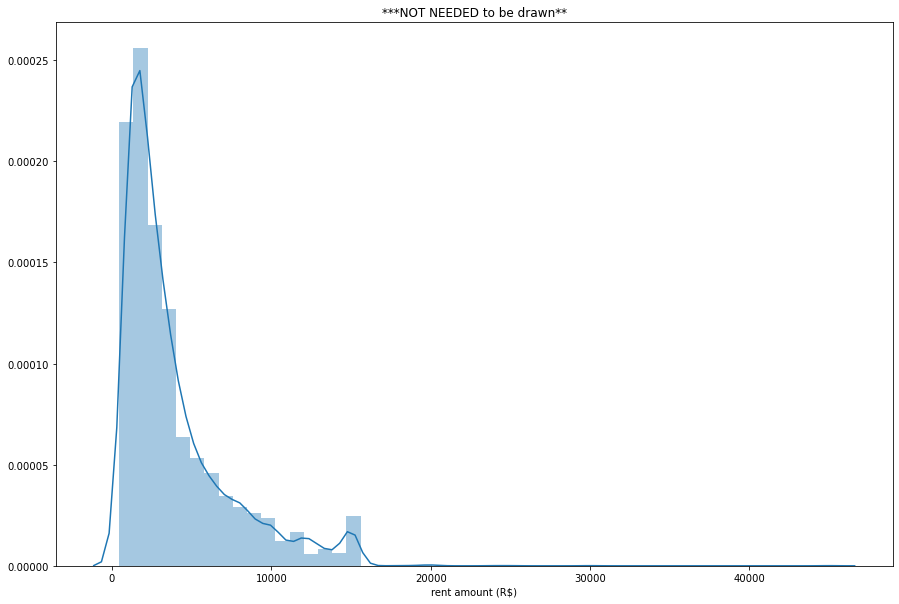

In [47]:
#not needed 
x= df[['area', 'rooms', 'bathroom', 'parking spaces']]
y = df['rent amount (R$)']

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('***NOT NEEDED to be drawn**')
seabornInstance .distplot(df['rent amount (R$)'])


In [13]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,rent amount (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,5.067995,3896.247194
std,537.016942,1.171266,1.407198,1.589521,6.069050,3408.545518
min,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1530.000000
50%,90.000000,2.000000,2.000000,1.000000,3.000000,2661.000000
75%,182.000000,3.000000,3.000000,2.000000,8.000000,5000.000000
max,46335.000000,13.000000,10.000000,12.000000,301.000000,45000.000000


In [18]:
#deciding dependent and dependent variables
from sklearn.linear_model import LinearRegression
X = df[['floor']].values
y = df['rent amount (R$)'].values
y=y.reshape(y.shape[0],1)

#SCALING and NORMALIZING
#X[:,0]=(X[:,0] - 149.217920)/46324
#X[:,1]=(X[:,1] - 2.506079)/12
#X[:,2]=(X[:,2] - 2.236813)/9
#X[:,3]=(X[:,3] - 1.609147)/12
X[:,0]=(X[:,0] - 5.067995)/301
#X[:,5]=(X[:,5] - 0.222222)/0.6
#X[:,6]=(X[:,6] - 0.756266)/1
y=(y-3896.247194)/44550

#splitting data into test set and train set and SCALING
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

#converting 1D array into 2D array
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
#training the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
b = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test) ], axis=1)
b.columns = ['floor[normalized]']
b

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [15]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.00020233]
[[0.25872473]]


In [19]:
#making predictions for test data
y_pred = regressor.predict(X_test)

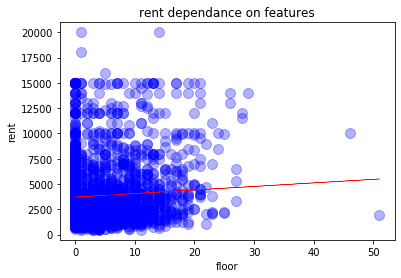

In [16]:
#plotting after linear regression
ax = plt.gca()
plt.plot(X_test, y_test,'bo', alpha=0.3,markersize=10)
plt.plot(X_test, y_pred, color='red', linewidth=0.5)
plt.title('rent dependance on features')  
plt.xlabel('floor')  
plt.ylabel('rent')
plt.show()


In [13]:
#plotting and comparing predicted and actual data
a = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
a

,Actual,Predicted
0,-0.008894,-0.044962
1,-0.058277,-0.028717
2,-0.058277,-0.060613
3,-0.043687,-0.016697
4,-0.051094,0.003982
...,...,...
2134,-0.062766,-0.025968
2135,-0.053788,-0.060969
2136,-0.067256,-0.054165
2137,-0.025729,0.012994


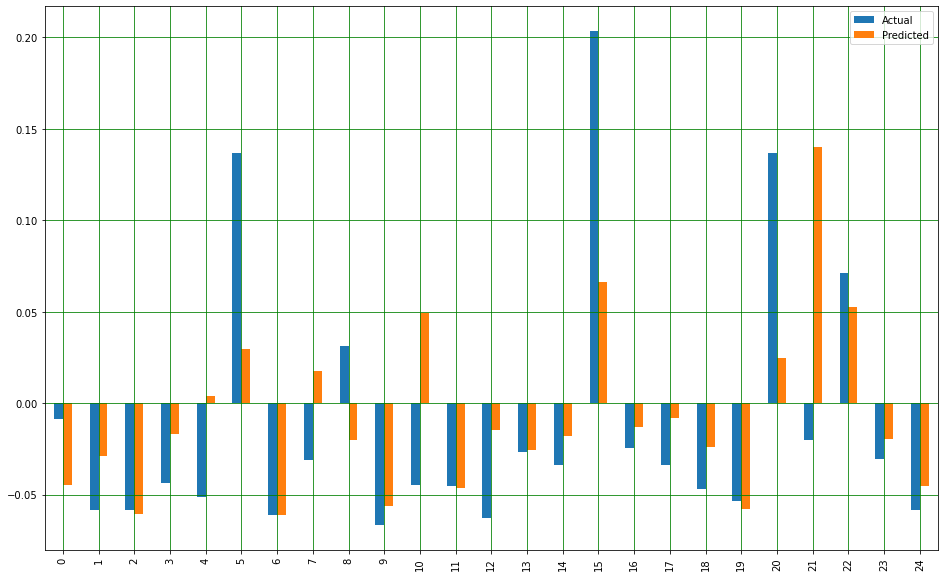

In [14]:
df1 = a.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.8', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='black')
plt.show()


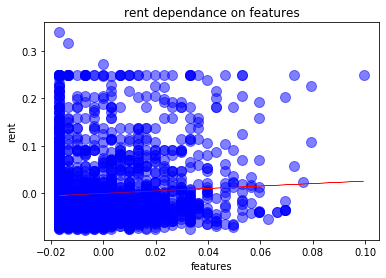

In [18]:
# trial to plot

#b.plot(x='area' , y='rent amount (R$)' , style='o', ax=ax,label='area') 
#b.plot(x ='rooms' , y= 'rent amount (R$)', style='o',ax=ax,label='rooms') 
#b.plot(x ='bathroom' , y= 'rent amount (R$)' , style='o',ax=ax,label='bathroom') 
#b.plot(x='parking spaces' , y ='rent amount (R$)' , style='o',ax=ax,label='parking spaces') 
#b.plot(x ='floor' , y='rent amount (R$)'  , style='o',ax=ax,label='floor' ) 
#b.plot(x='animal' , y ='rent amount (R$)' , style='o',ax=ax,label='animal' ) 
#b.plot(x = 'furniture', y='rent amount (R$)'  , style='o',ax=ax,label='furniture')


#plotting after linear regression
ax = plt.gca()
plt.plot(X_test, y_test,'bo', alpha=0.5,markersize=10)
plt.plot(X_test, y_pred, color='red', linewidth=0.5)
plt.title('rent dependance on features')  
plt.xlabel('features')  
plt.ylabel('rent')
plt.show()





In [20]:
#printing different errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05706191996879297
Mean Squared Error: 0.005870821319611421
Root Mean Squared Error: 0.07662128502975803


### Applying multivariate linear regression 
(But the essential feature from correlation matrix selection came to be only bathroom :)))
here I did not split the data into test and train so was not able to check the accuracy.
Only training and prediction. 

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64


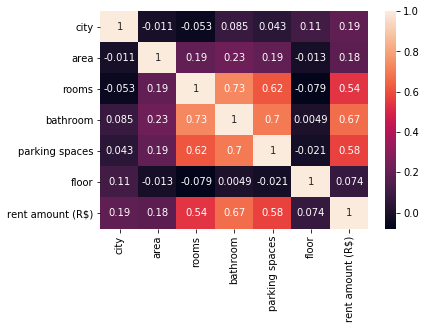

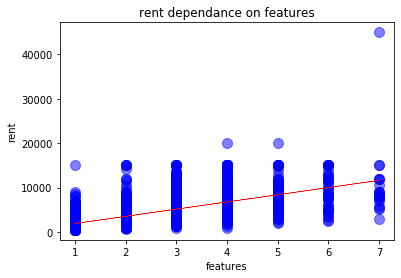

Root Mean Squared Error: 2589.9427494004503


In [26]:
#importing libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.utils import shuffle

%matplotlib inline

#Data loading and preprocessing
missing_values = ["-"]
sample_data = pd.read_csv('House_prediction.csv', na_values = missing_values)
#converting csv file into dataframe
df =pd.DataFrame(sample_data)
#shuffling data
i=0
for i in range(5):
    df = shuffle(df)
    
#checking for null valuse and replacing them
df.isnull()
df.fillna(0, inplace=True)

#label encoding animal and furniture columns
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['animal']=le.fit_transform(df['animal']) 
df['furniture']=le.fit_transform(df['furniture'])
df['city']=le.fit_transform(df['city'])

#check for null values
print(df.isnull().sum())
 
df

#correlation matrix for relation check
df = pd.DataFrame(df,columns=['city','area', 'rooms', 'bathroom', 'parking spaces','floor','rent amount (R$)',])
corrMatrix = df.corr()
    #plotting the correlation matrix
seabornInstance.heatmap(corrMatrix, annot=True)
plt.show()

#Correlation with output variable
corrMatrix_target = abs(corrMatrix["rent amount (R$)"])
#Selecting highly correlated features
relevant_features = corrMatrix_target[corrMatrix_target>0.4]
relevant_features

#so bathroom comes out to be the feature selected 

#Now I shall train my data set 

    #1.Allocation and splitting the data set 
    
X = df[['bathroom']].values
y = df[['rent amount (R$)']].values

    #Normalization
#X[:,0]=(X[:,0] - 5.067995)/301
#y=(y-3896.247194)/44550

    #splitting data into test set and train set and SCALING
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

    #converting 1D array into 2D array
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

     #Training model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

    #making predictions for test data
y_pred = regressor.predict(X_test)

    #plotting after linear regression
ax = plt.gca()
plt.plot(X_test, y_test,'bo', alpha=0.5,markersize=10)
plt.plot(X_test, y_pred, color='red', linewidth=0.5)
plt.title('rent dependance on features')  
plt.xlabel('features')  
plt.ylabel('rent')
plt.show()


##print(y.ndim)
##print(y.shape)

#Predict the price of the house given the no. of bathrooms 

#predictedPrice = regr.predict([[2]])
#print(predictedPrice)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


### Applying forced multivariate linear regression

In [27]:
y

array([[ 2400],
       [ 1700],
       [ 3300],
       ...,
       [ 3150],
       [11000],
       [ 4000]], dtype=int64)